<a href="https://colab.research.google.com/github/Skc69/MEMT680-/blob/main/MEM_T680_HW_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
## Here are some packages and modules that you will use. Make sure they are installed.

# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for modeling 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier

import plotly.express as px

from imblearn.over_sampling import SMOTE

# to avoid warnings
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [142]:
df = pd.read_csv("../content/uci-secom.csv")
df.tail(3)


Time        0        1          2          3       4  \
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5        6       7       8  ...       581     582     583     584  \
1564  100.0  99.4122  0.1208     NaN  ...   43.5231  0.4987  0.0153  0.0041   
1565  100.0  98.7978  0.1213  1.4622  ...   93.4941  0.5004  0.0178  0.0038   
1566  100.0  85.1011  0.1235     NaN  ...  137.7844  0.4987  0.0181  0.0040   

         585     586     587     588       589  Pass/Fail  
1564  3.0590  0.0197  0.0086  0.0025   43.5231         -1  
1565  3.5662  0.0262  0.0245  0.0075   93.4941         -1  
1566  3.6275  0.0117  0.0162  0.0045  137.7844         -1  

[3 rows x 592 columns]

In [143]:
type(df.to_numpy())
df.to_numpy()[0]

array(['2008-07-19 11:55:00', 3030.93, 2564.0, 2187.7333, 1411.1265,
       1.3602, 100.0, 97.6133, 0.1242, 1.5005, 0.0162, -0.0034, 0.9455,
       202.4396, 0.0, 7.9558, 414.871, 10.0433, 0.968, 192.3963, 12.519,
       1.4026, -5419.0, 2916.5, -4043.75, 751.0, 0.8955, 1.773, 3.049,
       64.2333, 2.0222, 0.1632, 3.5191, 83.3971, 9.5126, 50.617, 64.2588,
       49.383, 66.3141, 86.9555, 117.5132, 61.29, 4.515, 70.0, 352.7173,
       10.1841, 130.3691, 723.3092, 1.3072, 141.2282, 1.0, 624.3145,
       218.3174, 0.0, 4.592, 4.841, 2834.0, 0.9317, 0.9484, 4.7057,
       -1.7264, 350.9264, 10.6231, 108.6427, 16.1445, 21.7264, 29.5367,
       693.7724, 0.9226, 148.6009, 1.0, 608.17, 84.0793, nan, nan, 0.0,
       0.0126, -0.0206, 0.0141, -0.0307, -0.0083, -0.0026, -0.0567,
       -0.0044, 7.2163, 0.132, nan, 2.3895, 0.969, 1747.6049, 0.1841,
       8671.9301, -0.3274, -0.0055, -0.0001, 0.0001, 0.0003, -0.2786, 0.0,
       0.3974, -0.0251, 0.0002, 0.0002, 0.135, -0.0042, 0.0003, 0.0056,
  

In [144]:
df.shape

(1567, 592)

In [145]:
df.head(3)

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   

          6       7       8  ...       581     582     583     584     585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035  2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055  4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039  3.1745   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  

[3 rows x 592 columns]

In [146]:
df.values

array([['2008-07-19 11:55:00', 3030.93, 2564.0, ..., nan, nan, -1],
       ['2008-07-19 12:32:00', 3095.78, 2465.14, ..., 0.006, 208.2045,
        -1],
       ['2008-07-19 13:17:00', 2932.61, 2559.94, ..., 0.0148, 82.8602, 1],
       ...,
       ['2008-10-17 05:26:00', 2978.81, 2379.78, ..., 0.0025, 43.5231,
        -1],
       ['2008-10-17 06:01:00', 2894.92, 2532.01, ..., 0.0075, 93.4941,
        -1],
       ['2008-10-17 06:07:00', 2944.92, 2450.76, ..., 0.0045, 137.7844,
        -1]], dtype=object)

In [147]:
#Data cleaning - remove all null vaules
print(df.isna().sum())

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64


In [148]:
px.histogram((df.isna().sum()))

In [149]:
missing_values = df.isnull()
missing_values

Time      0      1      2      3      4      5      6      7      8  \
0     False  False  False  False  False  False  False  False  False  False   
1     False  False  False  False  False  False  False  False  False  False   
2     False  False  False  False  False  False  False  False  False  False   
3     False  False  False  False  False  False  False  False  False  False   
4     False  False  False  False  False  False  False  False  False  False   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1562  False  False  False  False  False  False  False  False  False  False   
1563  False  False  False  False  False  False  False  False  False  False   
1564  False  False  False  False  False  False  False  False  False   True   
1565  False  False  False  False  False  False  False  False  False  False   
1566  False  False  False  False  False  False  False  False  False   True   

      ...    581    582    583    584    585    586    587    588    589  \
0     ...   True  False  False  False  False   True   True   True   True   
1     ...  False  False  False  False  False  False  False  False  False   
2     ...  False  False  False  False  False  False  False  False  False   
3     ...  False  False  False  False  False  False  False  False  False   
4     ...   True  False  False  False  False  False  False  False  False   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1562  ...  False  False  False  False  False  False  False  False  False   
1563  ...   True  False  False  False  False  False  False  False  False   
1564  ...  False  False  False  False  False  False  False  False  False   
1565  ...  False  False  False  False  False  False  False  False  False   
1566  ...  False  False  False  False  False  False  False  False  False   

      Pass/Fail  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
1562      False  
1563      False  
1564      False  
1565      False  
1566      False  

[1567 rows x 592 columns]

In [150]:
px.histogram(missing_values)

/usr/local/lib/python3.8/dist-packages/plotly/express/_core.py:1222: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`



In [151]:
r = range(0,589,1)

In [152]:
df.shape

(1567, 592)

In [153]:
df = df[df.columns[df.isna().sum()<100]]
print(df)

                     Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...      577     582     583     584

In [154]:
new_data = df.dropna().replace(-1, 0)
print(new_data)

                     Time        0        1          2          3       4  \
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
5     2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1537  2008-10-15 18:16:00  3006.22  2525.20  2192.7889  1268.5852  1.9935   
1539  2008-10-15 19:24:00  2908.94  2560.99  2187.3444  2882.8558  1.5876   
1540  2008-10-15 21:44:00  2996.04  2555.92  2190.7666  3530.2362  0.8017   
1541  2008-10-15 22:45:00  3246.31  2499.79  2216.8111  1190.4067  2.5148   
1550  2008-10-16 03:56:00  3072.20  2406.47  2195.4444  2914.1792  1.5978   

          5         6       7       8  ...      577     582     583     584

In [155]:
X = new_data.drop(columns=['Time'])
y = new_data['Pass/Fail']

In [156]:
print(X[:5])
print(X.shape)
print(y[:5])
print(y.shape)

         0        1          2          3       4      5         6       7  \
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
5  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...      577     582     583     584      585     586  \
1  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   4.4447  0.0096   
2  1.4436  0.0041  ...   9.2721  0.4958  0.0157  0.0039   3.1745  0.0584   
3  1.4882 -0.0124  ...   8.5831  0.4990  0.0103  0.0025   2.0544  0.0202   
4  1.5031 -0.0031  ...  10.9698  0.4800  0.4766  0.1045  99.3032  0.0202   
5  1.5287  0.0167  ...  13.7755  0.4949  0.0189  0.0044   3.8276  0.0342   

      587     588       589  Pass/Fail  
1  0.0201  0.0060  208.2045      

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .3, random_state = 42)

In [158]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(975, 539)
(418, 539)
(975,)
(418,)


In [159]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [160]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.93      0.99      0.96       390
           1       0.00      0.00      0.00        28

    accuracy                           0.93       418
   macro avg       0.47      0.50      0.48       418
weighted avg       0.87      0.93      0.90       418



In [161]:
cm = confusion_matrix(y_test, predictions)

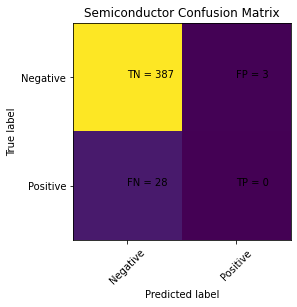

In [162]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.viridis)
classNames = ['Negative','Positive']
plt.title('Semiconductor Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Question: Describe what might be wrong with this model, does it provide any practical value? 
Answer: Our machine thinks that every sample fails the test. This may be because of how the data was normalized, or the parameters were optimized.

In [164]:
clf = RandomForestClassifier(criterion = "gini", max_depth = 8, min_samples_split = 10,random_state = 5)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, random_state=5)

In [ ]:
clf.feature_importances_

In [166]:
df.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '577', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=540)

In [168]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [169]:
confusion_matrix(y_test, y_pred)

array([[390,   0],
       [ 28,   0]])

In [173]:
accuracy_score(y_test, y_pred)

0.9330143540669856

In [176]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.92857143, 0.92857143, 0.92857143, 0.94897959, 0.92857143,
       0.93814433, 0.93814433, 0.92783505, 0.93814433, 0.94845361])

NameError: ignored